**YOUR NAME HERE**

Spring 2022

CS 252: Mathematical Data Analysis and Visualization

Project 5: Clustering

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

In [2]:
import pandas as pd
super_simple = pd.read_csv('data/super_simple.csv')
super_simple = super_simple.to_numpy()

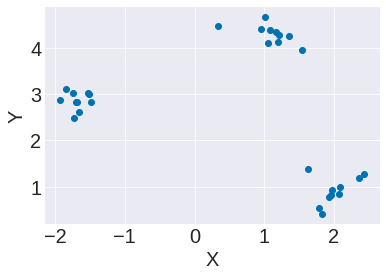

In [3]:
plt.scatter(super_simple[:,0],super_simple[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$ for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [4]:
cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [5]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [6]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [7]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [8]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `assign_labels`

In [9]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.assign_labels(init_centroids)
print(f'After the first assign data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first assign data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids`

In [10]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]


You should see:

    After the first centroid update, your cluster assignments are:
        [[ 1.09087  4.29295]
         [-1.68133  2.85917]
         [ 2.00717  0.9184 ]]
    Your difference from previous centroids:
        [[ 0.75287 -0.17425]
         [ 0.15877 -0.25313]
         [ 0.21407  0.3757 ]]

#### Test `inertia`

In [11]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.10738760429999997
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot. Make sure that the cluster assignment looks like the following image:

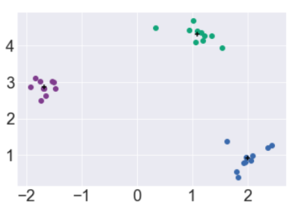

None


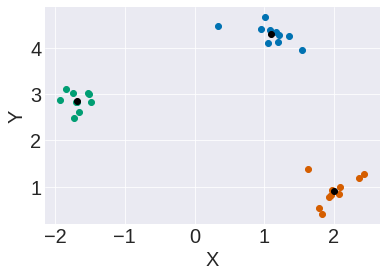

In [12]:
cluster.plot_clusters()

### 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset. This is the first step in a two-step implementation. For this simple data set, the clusters are not as sensitive to the initial conditions (randomly chosen centroids) as for other data. We will be making the elbow plot with just one run of kmeans per number of clusters.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

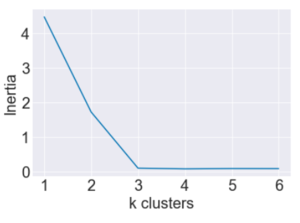

/usr/local/anaconda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/anaconda/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


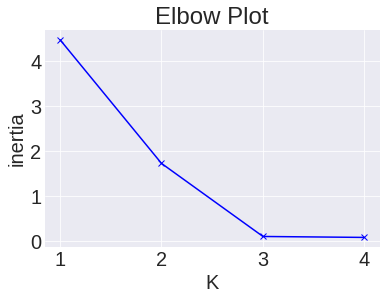

In [13]:
cluster.elbow_plot(6)

**Question 1:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer:** 
3 because the inertia after that point is way less

#### Determine number of clusters in `five_blobs` dataset

- Load in the `five_blobs` dataset.
- Repeat 5 times:
    - Run K-means on it.
    - Create a scatterplot to visualize the clustering.
    - Print the inertia or include it in the title

**NOTE:** Keep the random seed line in each of the 5 cells below.

In [14]:
# Load in the data and put it into a matrix in this cell
import pandas as pd
five_blobs = pd.read_csv('data/five_blobs.csv')
five_blobs = five_blobs.to_numpy()
cluster = kmeans.KMeans(five_blobs)

7.116345982439028


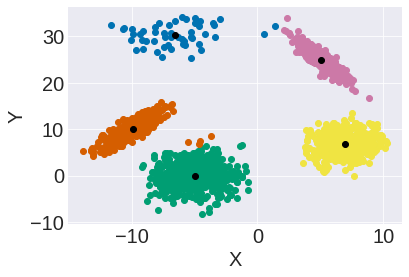

In [15]:
# Run the clustering algorithm and plot the results for one seed.
np.random.seed(0)
cluster.cluster(k=5,max_iter=50)
cluster.plot_clusters()

7.115591545930548


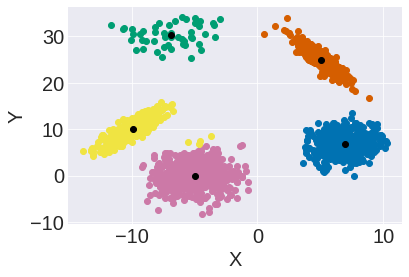

In [16]:
# Run the clustering algorithm and plot the results for a second seed.
np.random.seed(1)
cluster.cluster(k=5,max_iter=50)
cluster.plot_clusters()

10.094389877943538


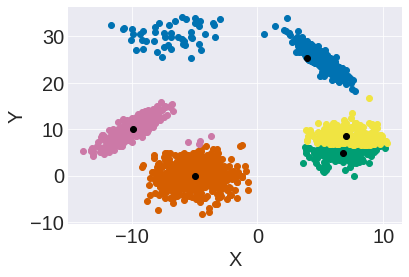

In [17]:
# Run the clustering algorithm and plot the results for a third seed.
np.random.seed(2)
cluster.cluster(k=5,max_iter=50)
cluster.plot_clusters()

7.116345982439028


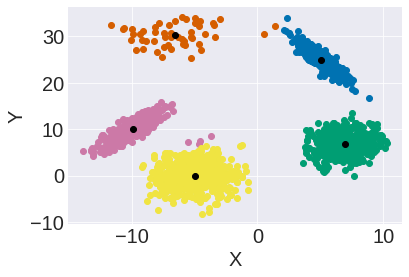

In [18]:
# Run the clustering algorithm and plot the results for a fourth seed.
np.random.seed(3)
cluster.cluster(k=5,max_iter=50)
cluster.plot_clusters()

9.989589099118499


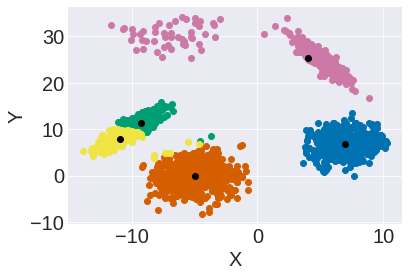

In [19]:
# Run the clustering algorithm and plot the results for a fifth seed.
np.random.seed(4)
cluster.cluster(k=5,max_iter=50)
cluster.plot_clusters()

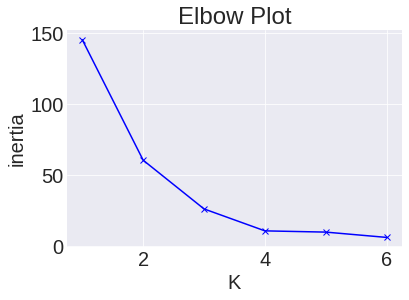

In [21]:
cluster.elbow_plot(6)

**Question 2:** What's wrong with clusters shown in the scatterplots? Why does it happen? Does the value of the inertia make sense for each of the images?

**Answer:** there where times where a cluster we can see is divided in 2 making the inertia bigger

**Question 3:** An elbow plot should show that increasing the number of clusters decreases the inertia. Does this plot have that trend? If not, why not?

**Answer:** as we can see in the elbow plot from above as we increase the number of k there are more centroids and thus the distance between the centroids and the points are smaller

#### Run K-means multiple times, save the best clustering

To address the problems faced above, we can run K-means multiple times and take the best results for our clustering.

- Implement `cluster_batch`
- Run `cluster_batch` with a sensible $k$ value and `n_iter=10`
- Run `plot_clusters` again.
- Report the inertia either by printing it out or adding to the figure title.

7.116345982439028


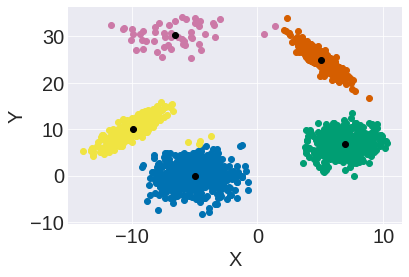

In [22]:
cluster.cluster_batch(k=5,n_iter=10)
cluster.plot_clusters()

**Question 4:** Did the clustering improve? Why?

**Answer:** it improved from some of them, this because it grabed 10 different initial centroids and calculated its inertia and returned the one with the smallest inertia

#### Improve the elbow plot for the `five_blobs` dataset

This is the second step in a two-step implementation of the `elbow_plot`. We have seen that k-means clustering can be sensitive to initial conditions, and that it is helpful to run it multiple times to find the best clusters. In this step, we alter `elbow_plot` to call `cluster_batch` instead of `cluster`.

- Add a parameter `n_iter` to `elbow_plot` in `kmeans.py`. Give it a default value of 1. (And don't forget to update the docstring to include the new parameter!)
- Change the `elbow_plot` code to call `cluster_batch` instead of `cluster`.
- Create an elbow plot showing the inertia with different $k$ values. This could take a long time to run, so we suggest using `n_iter=10` and a maximum `k` of 10.

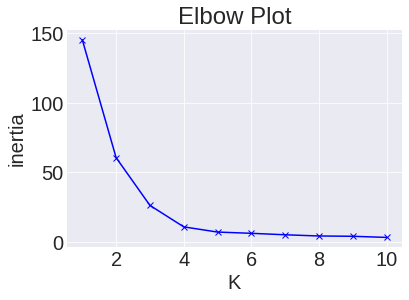

In [23]:
cluster.elbow_plot(10,10)

**Question 5:** Does this elbow plot look more like we expected than the original? How many clusters are there? Is it easy or hard to determine? Does it make sense?

**Answer 5:** they both look simillar in the way that as K increase inertia decrease

## Task 2: Improved initialization and cluster detection (CS252 only)

Here, we will explore more sophisticated techniques for initializing K-means and determining the number of clusters in a dataset. 

### 2a) K-means++ initialization

- In `kmeans.py::initialize_plusplus` implement the K-means++ initialization algorithm.

Recall that the idea is to set the 1st centroid to be a random data sample. To determine each of the remaining centroids, compute the MINIMUM distance from each data sample to ONLY the centroids ALREADY DEFINED (i.e. what's the closest distance of each point to centroids that are currently defined). For example, if we're determining centroid 3, we would find the distance between each data sample and the closest centroid (1 or 2...whichever is closer). Then, we use these distances to create a probability distribution. The next centroid is determined by selecting a data sample in the dataset according to this probability distribition. The equation for the probability distribution is:$$p(x_i) = \frac{D(x_i)^2}{\sum_{j=1}^N D(x_j)^2}$$ where $D(x_i)$ is the distance between data sample $x_i$ and the nearest centroid already defined and $N$ is the number of data samples, like usual.

- Update `cluster` to take in an keyword argument `init_method='random'`. If the user selects 'random', run the old method. If the user selects 'kmeans++', run the K-means++ initialization.
- Create a scatterplot below with K-means++ initialization

In [ ]:
np.random.seed(3)



**Question 6:** Did the clustering get better? Why?

**Answer 6:** 

#### Compare number of iterations needed for K-means to converge

- Add support for the `init_method` optional parameter in `cluster_batch`.
- Add a return value to `cluster_batch`: the mean number of iterations required for each K-means instance to converge.
- Below, print out the mean number of iterations required for `random` and `kmeans++` initialization methods with the `five_blobs` dataset.

In [ ]:
np.random.seed(3)



**Question 7:** Which initialization method is better with respect to number of iterations required to converge?

**Answer 7:** 

## Task 3: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 2a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [24]:
from matplotlib.image import imread
data = imread('data/baby_bird.jpeg')
#print(data)
data = np.array(data)

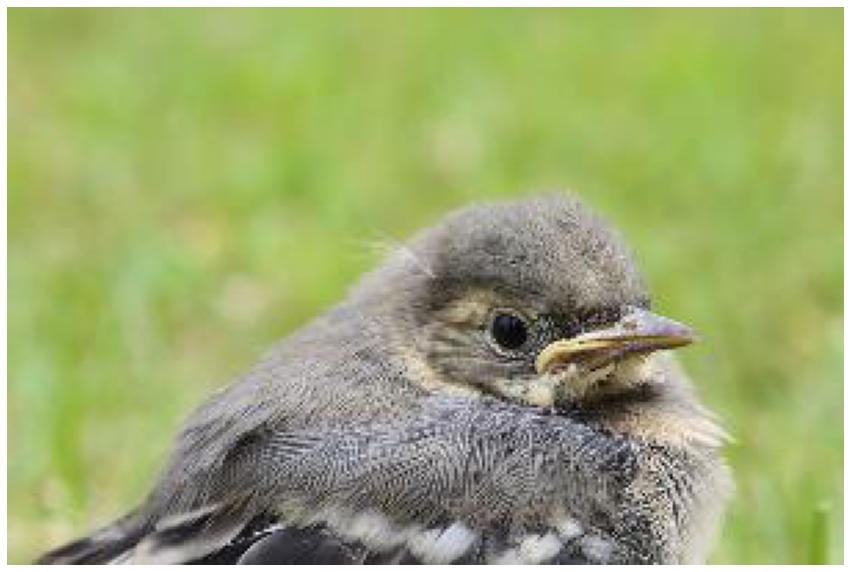

In [25]:
fig, axes = plt.subplots(1,1, figsize = (15,15))
axes.yaxis.set_visible(False)
axes.xaxis.set_visible(False)
axes.imshow(data)

### 3b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. This means we are going from a 3D array to a 2D array. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [26]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    reshapedImage = img.transpose(2,0,1).reshape(3,-1)
    return reshapedImage.T

In [27]:
flat = flatten(data)
print(flat.shape)



(61206, 3)


### 3c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [34]:
clus = kmeans.KMeans(flat)
clus.cluster(2)
clus.replace_color_with_centroid()

In [35]:
print(clus.data.shape)

(61206, 3)


### 3d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

(202, 303, 3)


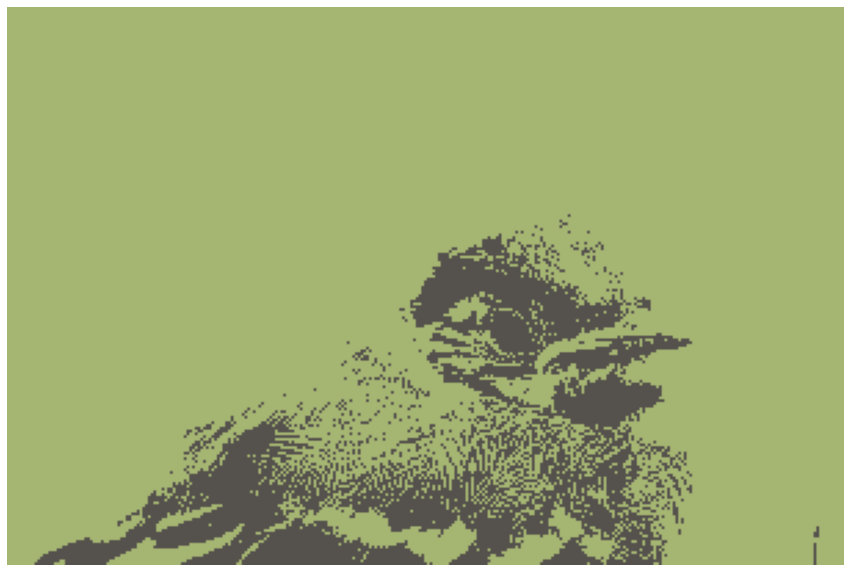

In [36]:
s = data.shape
unflat = clus.data.reshape(s)
print(unflat.shape)
unflat = unflat.astype(int)
fig, axes = plt.subplots(1,1, figsize = (15,15))
axes.yaxis.set_visible(False)
axes.xaxis.set_visible(False)
axes.imshow(unflat)

compared to a 10 cluster image

(202, 303, 3)


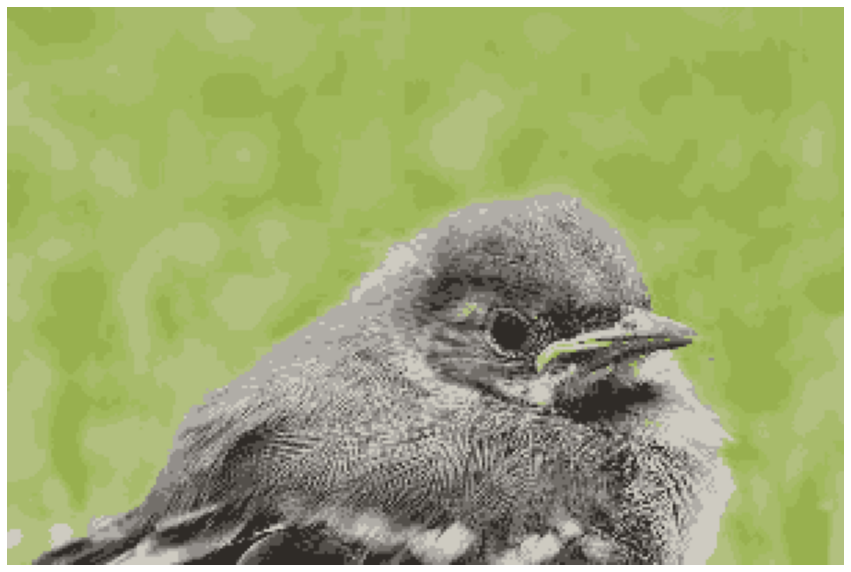

In [38]:
clus = kmeans.KMeans(flat)
clus.cluster(10)
clus.replace_color_with_centroid()
s = data.shape
unflat = clus.data.reshape(s)
print(unflat.shape)
unflat = unflat.astype(int)
fig, axes = plt.subplots(1,1, figsize = (15,15))
axes.yaxis.set_visible(False)
axes.xaxis.set_visible(False)
axes.imshow(unflat)

### 3e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

(61600, 3)
(175, 352, 3)


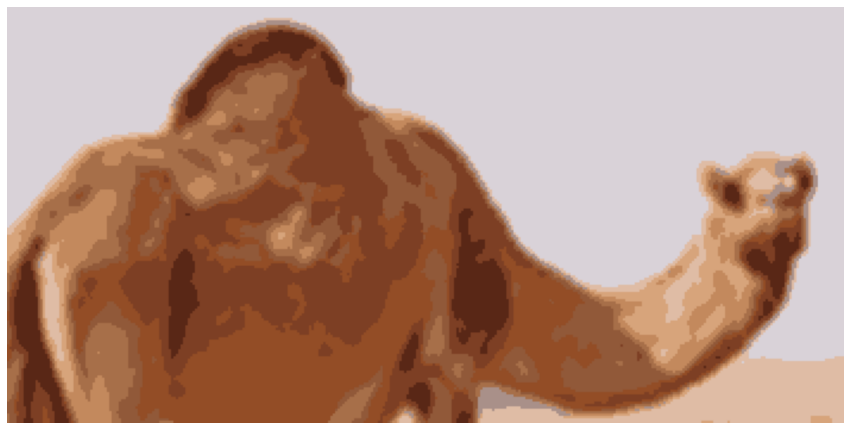

In [44]:
data = imread('data/lowres.jpg')
data = np.array(data)
flat = flatten(data)
clus = kmeans.KMeans(flat)
clus.cluster(10)
clus.replace_color_with_centroid()
s = data.shape
unflat = clus.data.reshape(s)
unflat = unflat.astype(int)
fig, axes = plt.subplots(1,1, figsize = (15,15))
axes.yaxis.set_visible(False)
axes.xaxis.set_visible(False)
axes.imshow(unflat)



## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

didnt change the notebook

### 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

### 3) Cluster additional datasets

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. siloutte score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?